<a href="https://colab.research.google.com/github/abdyraman/annualsatisfactionsurvey/blob/main/annualsatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting GS Data



In [1]:
#Authentification to google collab
from google.colab import auth
auth.authenticate_user()
#Other libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gspread
from google.auth import default
creds,_=default()

gs=gspread.authorize(creds)
#Get google sheet
# Open the Google Sheet by name (do not include the .gsheet extension)
sheet = gs.open("Annual job satisfaction (Responses)") # Correct name without .gsheet

# Access the specific worksheets
df_text = pd.DataFrame(sheet.worksheet("Form Responses 1").get_all_records())
df_numbers = pd.DataFrame(sheet.worksheet("numeric").get_all_records())


# Text data

In [3]:
#Checked for NaN values
df_text.isnull().sum()

,0
Timestamp,0
How happy are you with your work environment?,0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],0
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],0
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",0


In [4]:
df_text.dtypes

,0
Timestamp,object
How happy are you with your work environment?,object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",object
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],object
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",object
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],object
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",object


In [5]:
#Checking the unique answer points per feature
unique_counts_objects = df_text.select_dtypes('object').nunique()
unique_counts_objects

,0
Timestamp,100
How happy are you with your work environment?,12
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",5
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",5
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],5
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],5
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",5
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],5
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],5
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",5


In [6]:
# Looping through each categorical variable and printing its unique values and counts
for i in unique_counts_objects.index:
    unique_values = df_text[i].value_counts()
    print(f'Unique values of {i}:')
    print(unique_values)
    print()

Unique values of Timestamp:
Timestamp
9/21/2024 16:18:48     1
11/23/2024 16:18:48    1
12/3/2024 16:18:48     1
12/2/2024 16:18:48     1
12/1/2024 16:18:48     1
                      ..
10/21/2024 16:18:48    1
10/20/2024 16:18:48    1
10/19/2024 16:18:48    1
10/18/2024 16:18:48    1
12/29/2024 16:18:48    1
Name: count, Length: 100, dtype: int64

Unique values of How happy are you with your work environment?:
How happy are you with your work environment?
                                                                                                                                                                                                                                                                                                                         89
I'm really content with my work environment! It's stimulating and collaborative, with opportunities to learn and grow. I appreciate how my efforts are valued, and I feel supported in the tasks I take on. Of course, there 

In [70]:
def clean_column_names(columns):
    # Define the patterns to remove
    patterns = [
        r"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' \s*\[",
        r"Please rate the following statements on a scale from 'Never' to 'All of the time' \s*\[",
        r"Please rate the following statements on a scale from 'Very Unlikely' to 'Very Likely'\s*\[",
        r"Please rate the following statements on a scale from 'Strongly Dissatisfied' to 'Strongly Satisfied'\s*\["
    ]

    # Join patterns with `|` for regex
    combined_pattern = '|'.join(patterns)

    # Perform the replacement and ensure spaces are handled correctly
    cleaned_columns = columns.str.replace(combined_pattern, "", regex=True).str.strip()

     # Remove trailing `]`
    cleaned_columns = cleaned_columns.str.replace(r'\s*\]', '', regex=True)

    # Normalize spaces to a single space, only if needed
    cleaned_columns = cleaned_columns.str.replace(r'\s+', ' ', regex=True)

    return cleaned_columns



In [8]:
# Select object columns from df_text
text = df_text.select_dtypes(include=['object'])
# # Clean the column names
text.columns = clean_column_names(text.columns)
text

,Timestamp,How happy are you with your work environment?,"I am well-informed about the organization's mission, vision, and values","The teams I work with include a diverse range of backgrounds, skills, and experiences",The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged,There is a strong sense of teamwork among my colleagues,"The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities",The organization has policies that support employees of all genders in balancing work with family responsibilities,I am treated with respect and appreciation by the people I work with,"The work environment is characterized by respectful and open communication, fostering trust and collaboration",...,"Office tasks, such as note-taking and managing meeting invites, are assigned fairly and according to job descriptions or distributed equally among participants","There are informal and formal workplace social outings where all groups, regardless of their background, are welcomed to participate",I would be comfortable reporting inappropriate conduct by a colleague,How likely are you to recommend this company to others seeking employment?,Which of the following describes your gender?,Do you identify as a person with a disability?,Do you identify as Indigenous?,Do you identify as visible minority?,Are you a member of the 2SLGBTQI+ communities?,What industry are you working in?
0,9/21/2024 16:18:48,I'm really content with my work environment! I...,Often,Sometimes,All of the time,Sometimes,All of the time,Often,Rarely,All of the time,...,Neutral,Agree,Disagree,Unlikely,Woman,I prefer not to say,I prefer not to say,I prefer not to say,I prefer not to say,Agriculture
1,9/22/2024 16:18:48,,Rarely,Sometimes,All of the time,Often,Never,Sometimes,All of the time,Never,...,Strongly Disagree,Strongly Disagree,Disagree,Likely,Prefer not to say,Yes,No,No,I prefer not to say,Finance
2,9/23/2024 16:18:48,I’m very happy with my work environment. It’s ...,All of the time,Never,Rarely,Rarely,Rarely,Sometimes,Rarely,Never,...,Strongly Disagree,Agree,Agree,Likely,Prefer not to say,Yes,I prefer not to say,No,No,Entertainment
3,9/24/2024 16:18:48,,Never,Never,Never,Sometimes,Often,Rarely,Sometimes,Often,...,Strongly Agree,Strongly Disagree,Disagree,Neutral,Prefer not to say,I prefer not to say,No,I prefer not to say,Yes,Non-for-profit
4,9/25/2024 16:18:48,,Sometimes,Often,Sometimes,Often,Never,Rarely,Sometimes,Sometimes,...,Agree,Strongly Agree,Strongly Disagree,Very Unlikely,Non-binary,I prefer not to say,No,I prefer not to say,I prefer not to say,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12/25/2024 16:18:48,,Rarely,Often,Never,Rarely,All of the time,All of the time,Sometimes,Rarely,...,Neutral,Strongly Agree,Neutral,Neutral,Man,Yes,No,No,No,Finance
96,12/26/2024 16:18:48,,All of the time,Never,Sometimes,Sometimes,Often,Rarely,All of the time,Rarely,...,Strongly Disagree,Agree,Neutral,Very Likely,Prefer not to say,No,Yes,No,No,Energy
97,12/27/2024 16:18:48,,Never,Often,Often,Rarely,Often,All of the time,Rarely,Rarely,...,Neutral,Strongly Disagree,Agree,Unlikely,Non-binary,I prefer not to say,No,No,I prefer not to say,Retail
98,12/28/2024 16:18:48,,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Often,Sometimes,All of the time,...,Strongly Agree,Strongly Disagree,Strongly Agree,Very Likely,Prefer not to say,I prefer not to say,No,No,No,Healthcare


# **Numeric data**

In [9]:
#Checking on numeric datatypes details
num=df_numbers.select_dtypes(include=['int64','float64'])
num.describe().T

,count,mean,std,min,25%,50%,75%,max
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",100.0,3.03,1.546942,1.0,1.75,3.0,5.00,5.0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",100.0,2.77,1.441485,1.0,1.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],100.0,2.85,1.388081,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],100.0,3.09,1.371389,1.0,2.00,3.0,4.00,5.0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",100.0,3.05,1.395339,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],100.0,3.07,1.437274,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],100.0,2.87,1.467871,1.0,1.75,3.0,4.00,5.0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",100.0,3.14,1.504337,1.0,2.00,3.0,5.00,5.0
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I am compensated fairly for my role and responsibilities],100.0,2.75,1.452097,1.0,1.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The criteria used to determine compensation are clearly defined],100.0,2.95,1.438117,1.0,2.00,3.0,4.00,5.0


In [10]:
num.isnull().sum()

,0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],0
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],0
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",0
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I am compensated fairly for my role and responsibilities],0
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The criteria used to determine compensation are clearly defined],0


In [11]:
num.dtypes

,0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",int64
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",int64
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],int64
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],int64
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",int64
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],int64
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],int64
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",int64
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I am compensated fairly for my role and responsibilities],int64
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The criteria used to determine compensation are clearly defined],int64


In [12]:
# Apply the cleaning function to the column names
num.columns = clean_column_names(num.columns)

Values & Norms

In [13]:
#Choosing variables that reflects the values and norms in the organisation
def values_norms(df):
    values_norms=df[[
    "I am well-informed about the organization's mission, vision, and values"
     ,"The teams I work with include a diverse range of backgrounds, skills, and experiences"
       ,"The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged"
       ,"There is a strong sense of teamwork among my colleagues"
       ,"The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities"
       ,"The organization has policies that support employees of all genders in balancing work with family responsibilities"
       ,"I am treated with respect and appreciation by the people I work with"
       ,"The work environment is characterized by respectful and open communication, fostering trust and collaboration"
       ]]
    return values_norms

values_norms_text=values_norms(text)

# Melt the DataFrame to long format
melted_values = values_norms_text.melt(var_name='Statement', value_name='Rating')

# Count occurrences of each rating per statement
rating_counts_values_norms = melted_values.groupby(['Statement','Rating']).size().reset_index(name='Count')


<ipython-input-14-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


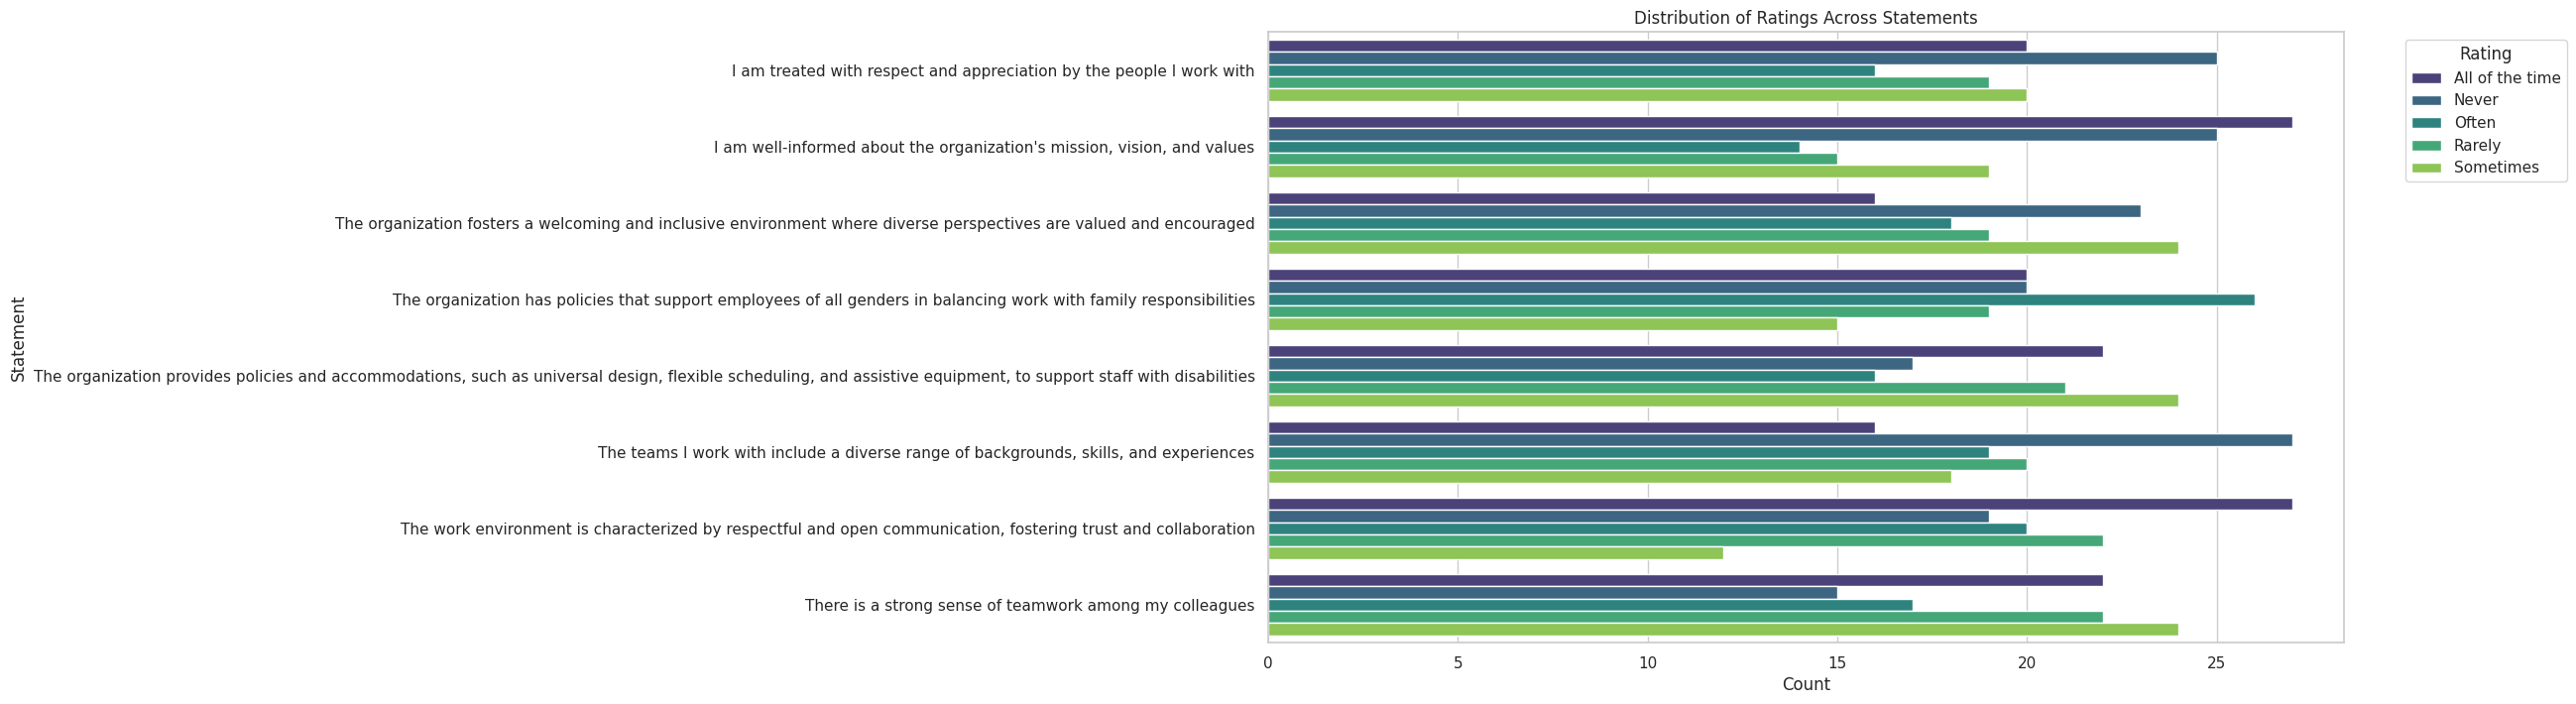

In [14]:
# Create a horizontal bar plot
def plotting (data):
  plt.figure(figsize=(14, 8))
  sns.set_theme(style="whitegrid")

  # Create a horizontal bar plot for each rating
  sns.barplot(x='Count', y='Statement', hue='Rating', data=data, palette='viridis', dodge=True)

  # Title and labels
  plt.title('Distribution of Ratings Across Statements')
  plt.xlabel('Count')
  plt.ylabel('Statement')
  plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

plotting(rating_counts_values_norms)

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


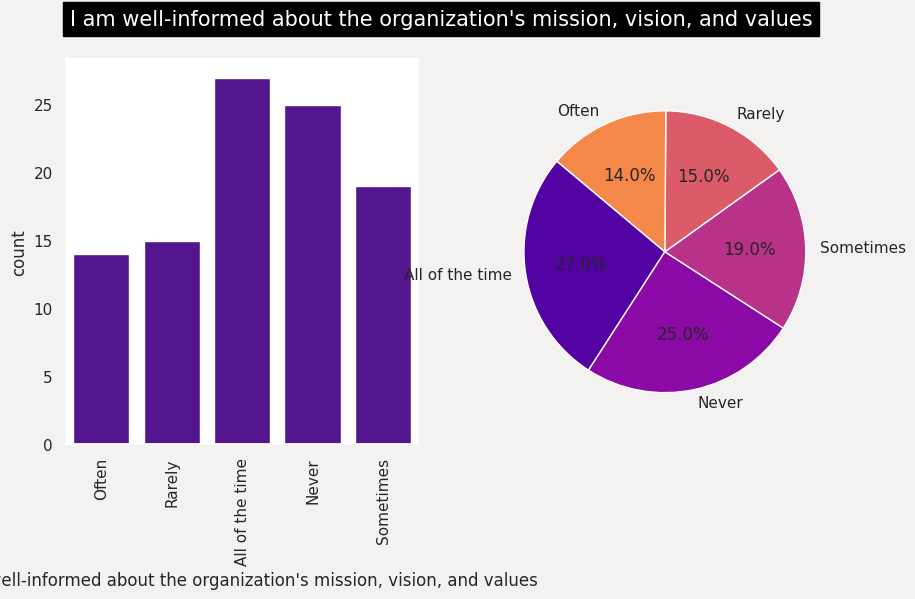

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


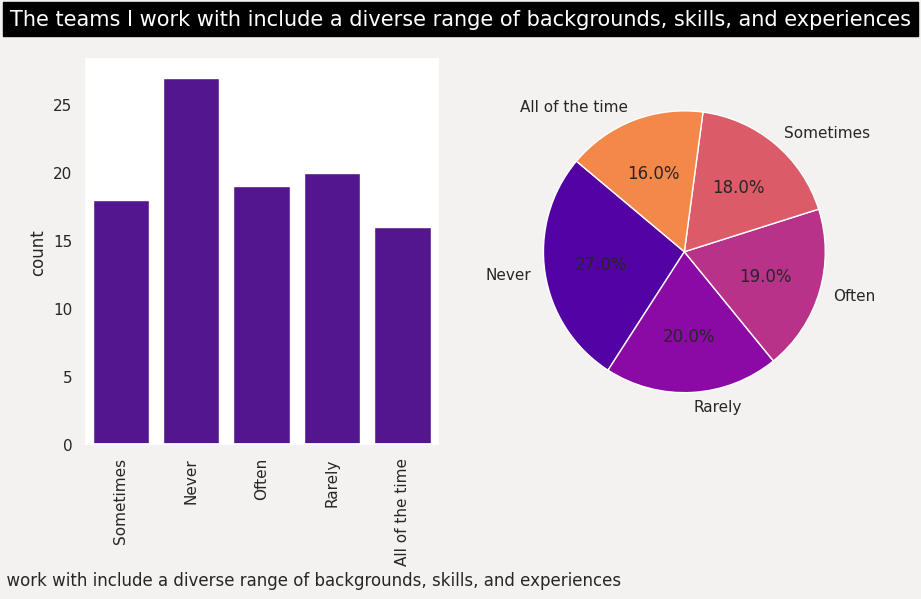

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


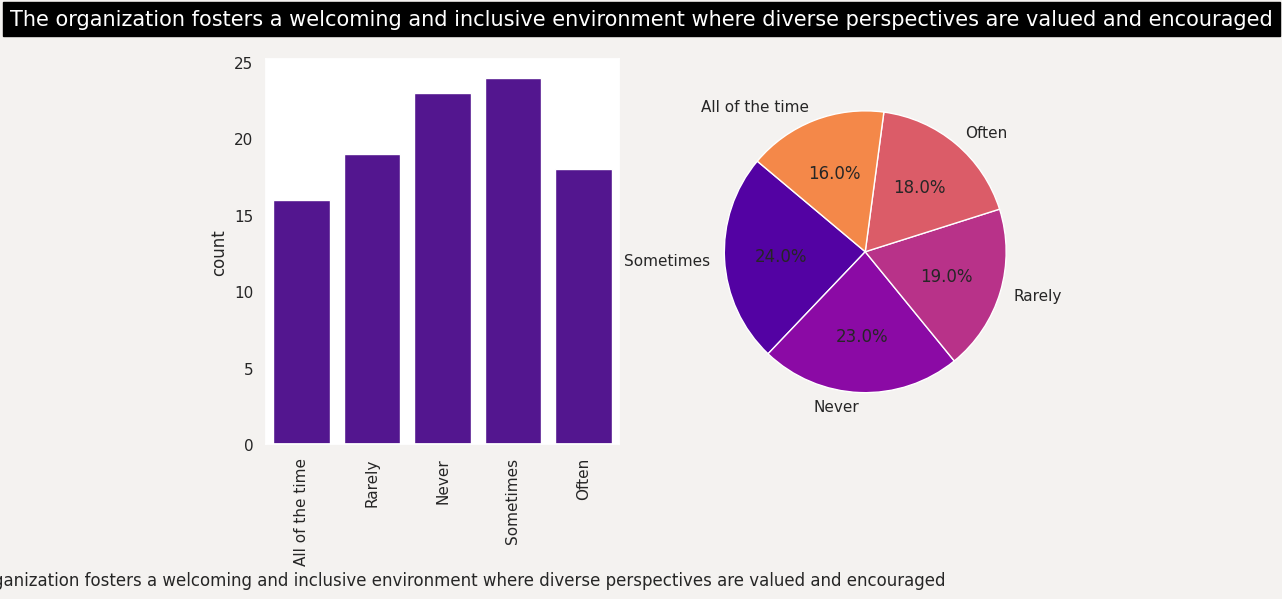

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


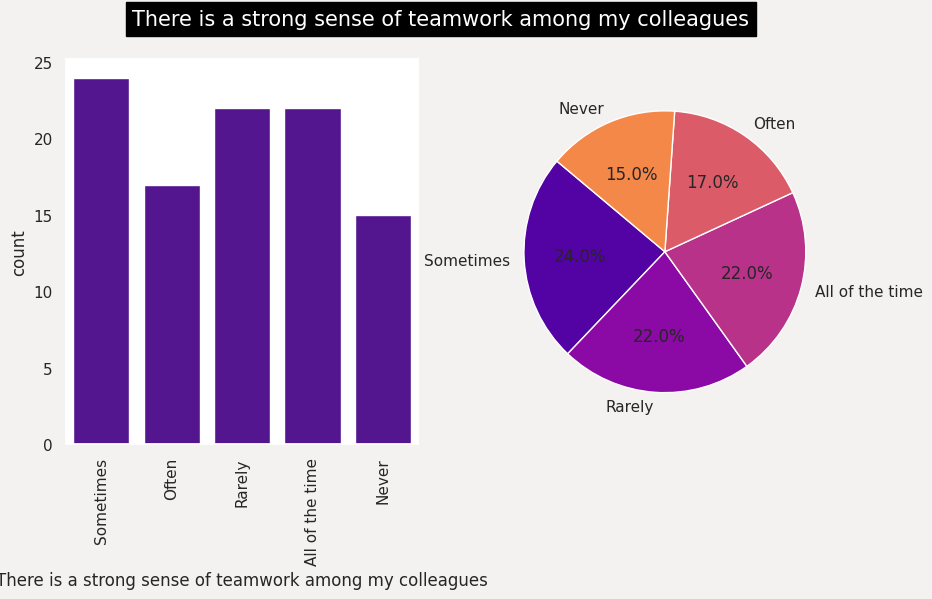

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


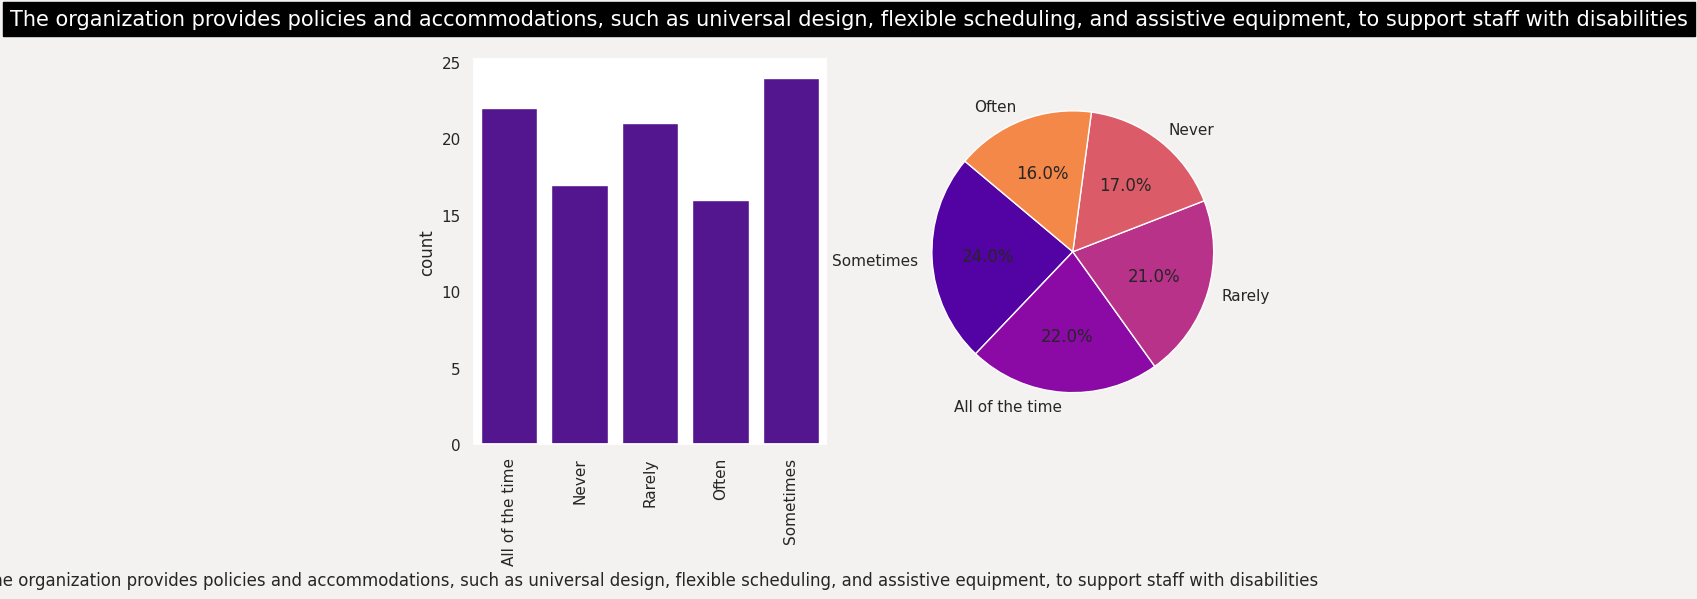

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


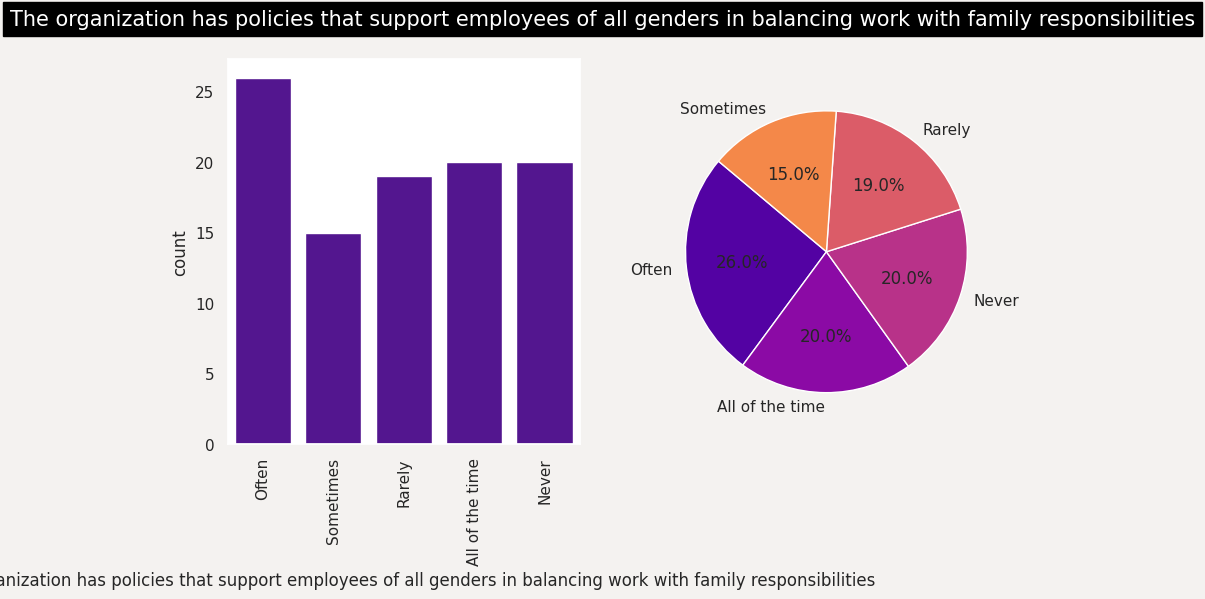

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


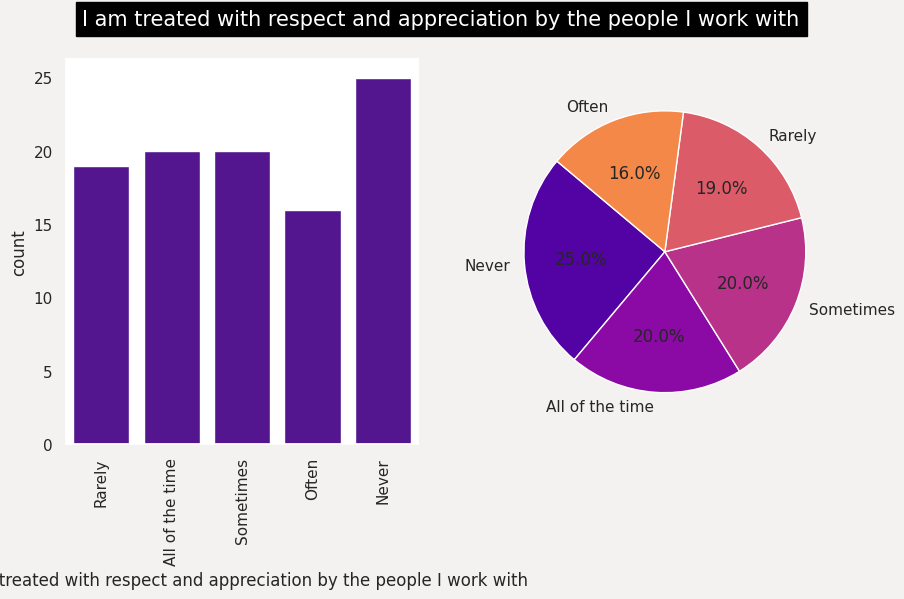

<ipython-input-15-47a8024b79f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


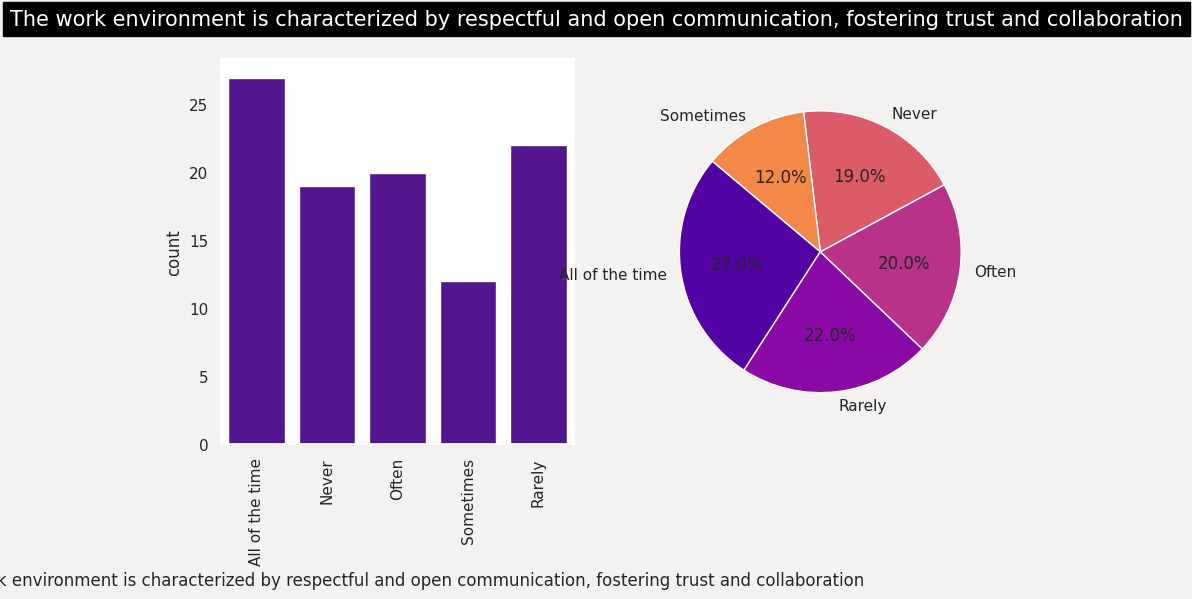

In [15]:
# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": '#F4F2F0'})
sns.set_palette("plasma")

# Loop through each categorical variable and create countplot and pie chart
for col in values_norms_text.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Countplot
    ax1 = sns.countplot(data=values_norms_text, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    # Pie chart
    count_values = values_norms_text[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()

In [16]:
values_norms_numeric=values_norms(num)
values_norms_numeric

,"I am well-informed about the organization's mission, vision, and values","The teams I work with include a diverse range of backgrounds, skills, and experiences",The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged,There is a strong sense of teamwork among my colleagues,"The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities",The organization has policies that support employees of all genders in balancing work with family responsibilities,I am treated with respect and appreciation by the people I work with,"The work environment is characterized by respectful and open communication, fostering trust and collaboration"
0,4,3,5,3,5,4,2,5
1,2,3,5,4,1,3,5,1
2,5,1,2,2,2,3,2,1
3,1,1,1,3,4,2,3,4
4,3,4,3,4,1,2,3,3
...,...,...,...,...,...,...,...,...
95,2,4,1,2,5,5,3,2
96,5,1,3,3,4,2,5,2
97,1,4,4,2,4,5,2,2
98,3,3,3,2,2,4,3,5


<ipython-input-17-e7b5708065bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = values_norms_numeric, palette=["#D4A1E7","#6faea4"])
<ipython-input-17-e7b5708065bf>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = values_norms_numeric, palette=["#D4A1E7","#6faea4"])
<ipython-input-17-e7b5708065bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = values_norms_numeric, palette=["#D4A1E7","#6faea4"])
<ipython-input-17-e7b5708065bf>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = values_norms_numeric, palette=["#D4

ValueError: Could not interpret value `I am compensated fairly for my role and responsibilities` for `x`. An entry with this name does not appear in `data`.

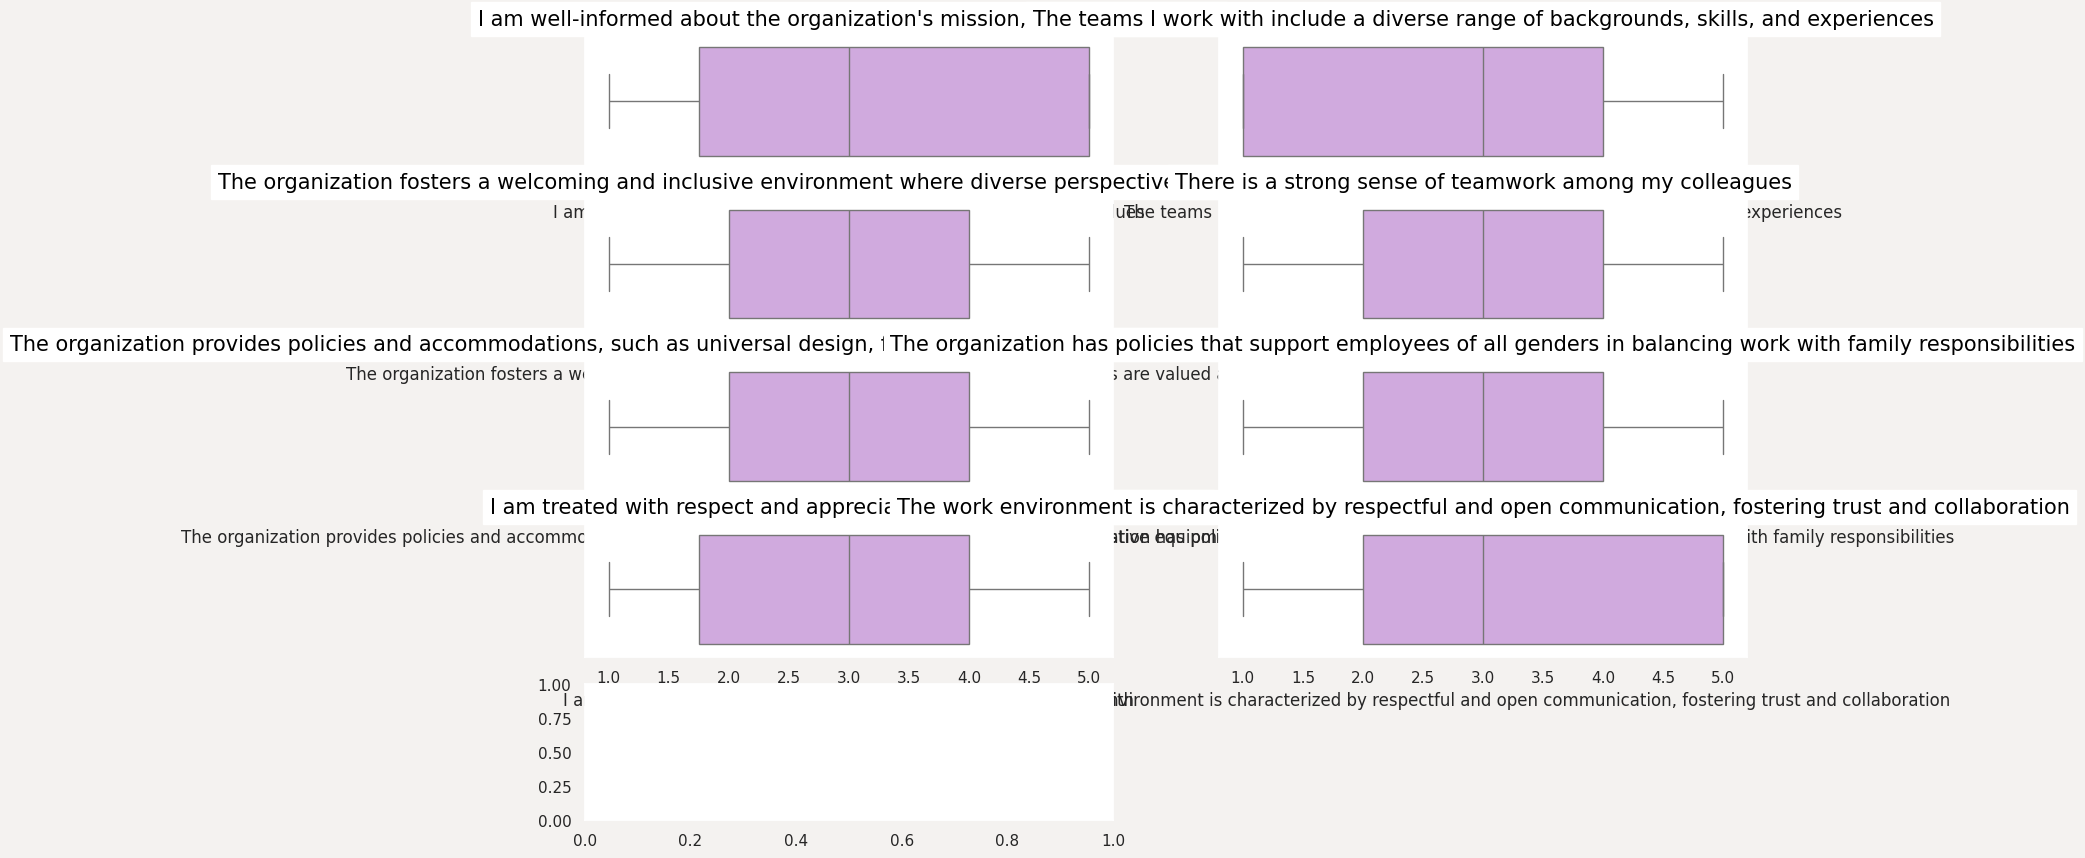

In [17]:
#Creating plots
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = values_norms_numeric, palette=["#D4A1E7","#6faea4"])
    plt.title(i,backgroundcolor='white',color='black',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()


In [ ]:
# Create a new worksheet
new_sheet_title = "Values_Norms"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="150", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_norms.columns.values.tolist()] + rating_counts_values_norms.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Values_Norms!A1:C41',
 'updatedRows': 41,
 'updatedColumns': 3,
 'updatedCells': 123}

In [ ]:
# Create a new worksheet
new_sheet_title = "Values_Norms_Numbers"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="150", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([values_norms_numeric.columns.values.tolist()] + values_norms_numeric.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Values_Norms_Numbers!A1:H101',
 'updatedRows': 101,
 'updatedColumns': 8,
 'updatedCells': 808}

Finances

In [23]:
def finances_part_one(df):
    values_finances = df[[
        "I am compensated fairly for my role and responsibilities",
        "The criteria used to determine compensation are clearly defined",
        "The benefits provided by the organization meet my needs fully",
        "Job compensation rates are transparent and clearly communicated"
    ]]
    return values_finances

def finances_part_two(df):
    values_finances = df[[
        "How satisfied are you with the overall compensation package provided by the organization",
        "How satisfied are you with clarity of communication regarding changes in compensation or benefits"
    ]]
    return values_finances

def finances_part_three(df):
    values_finances = df[[
        "To what extent do you feel that your compensation and benefits are competitive compared to similar roles in other organizations?"
    ]]
    return values_finances

# Assuming 'text' is your DataFrame
melted_values_one = finances_part_one(text)
melted_values_two = finances_part_two(text)
melted_values_three = finances_part_three(text)

# Melt the DataFrames to long format
melted_values_one = melted_values_one.melt(var_name='Statement', value_name='Rating')
melted_values_two = melted_values_two.melt(var_name='Statement', value_name='Rating')
melted_values_three = melted_values_three.melt(var_name='Statement', value_name='Rating')

# Count occurrences of each rating per statement
rating_counts_one = melted_values_one.groupby(['Statement', 'Rating']).size().reset_index(name='Count')
rating_counts_two = melted_values_two.groupby(['Statement', 'Rating']).size().reset_index(name='Count')
rating_counts_three = melted_values_three.groupby(['Statement', 'Rating']).size().reset_index(name='Count')

# Combine the results
rating_counts_values_finances= pd.concat([rating_counts_one, rating_counts_two, rating_counts_three])

# Display the result
rating_counts_values_finances

,Statement,Rating,Count
0,I am compensated fairly for my role and respon...,Agree,18
1,I am compensated fairly for my role and respon...,Disagree,17
2,I am compensated fairly for my role and respon...,Neutral,20
3,I am compensated fairly for my role and respon...,Strongly Agree,16
4,I am compensated fairly for my role and respon...,Strongly Disagree,29
5,Job compensation rates are transparent and cle...,Agree,18
6,Job compensation rates are transparent and cle...,Disagree,24
7,Job compensation rates are transparent and cle...,Neutral,16
8,Job compensation rates are transparent and cle...,Strongly Agree,26
9,Job compensation rates are transparent and cle...,Strongly Disagree,16


In [24]:
# Assuming 'text' is your DataFrame
melted_values_one = finances_part_one(num)
melted_values_two = finances_part_two(num)
melted_values_three = finances_part_three(num)

# Join the DataFrames
semifinish = melted_values_one.join(melted_values_two, how='outer', lsuffix='_one', rsuffix='_two')
finances = semifinish.join(melted_values_three, how='outer', lsuffix='_semifinish', rsuffix='_three')

# Display the result
finances.describe()

,I am compensated fairly for my role and responsibilities,The criteria used to determine compensation are clearly defined,The benefits provided by the organization meet my needs fully,Job compensation rates are transparent and clearly communicated,How satisfied are you with the overall compensation package provided by the organization,How satisfied are you with clarity of communication regarding changes in compensation or benefits,To what extent do you feel that your compensation and benefits are competitive compared to similar roles in other organizations?
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.750000,2.950000,3.090000,3.140000,3.070000,3.070000,2.900000
std,1.452097,1.438117,1.364003,1.449626,1.365188,1.430229,1.480513
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [25]:
 # Create a new worksheet
new_sheet_title = "Finances"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="150", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_finances.columns.values.tolist()] + rating_counts_values_finances.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Finances!A1:C36',
 'updatedRows': 36,
 'updatedColumns': 3,
 'updatedCells': 108}

In [ ]:
 # Create a new worksheet
new_sheet_title = "Finances Numbers"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="150", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([finances.columns.values.tolist()] + finances.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': "'Finances Numbers'!A1:G101",
 'updatedRows': 101,
 'updatedColumns': 7,
 'updatedCells': 707}

Recongnition

In [26]:
# import pandas as pd

def recognition(df):
    # Select relevant columns
    recognition_values = df[[
  "I am satisfied with my current role and responsibilities"
       ,"I have opportunities to contribute to the organization's goals and objectives"
       ,"I feel recognized and appreciated for my contributions"
       ,"Recognition and appreciation for my work are given in a timely and meaningful manner."
       ,"The organization provides adequate flexibility in work schedules to meet employees' personal and family needs"
       ,"The work schedule is flexible enough to accommodate my personal circumstances, such as pregnancy, disability, or caregiving responsibilities etc"
       ,"I feel a strong sense of motivation and commitment to excel in my current role"
       ,"I am motivated to go above and beyond in my current role"
    ]]

    return recognition_values

# Process the DataFrame
recognition_values = recognition(text)

# Melt the DataFrame to long format
melted_values = recognition_values.melt(var_name='Statement', value_name='Rating')

# Count occurrences of each rating per statement
rating_counts_recognition = melted_values.groupby(['Statement', 'Rating']).size().reset_index(name='Count')


<ipython-input-70-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


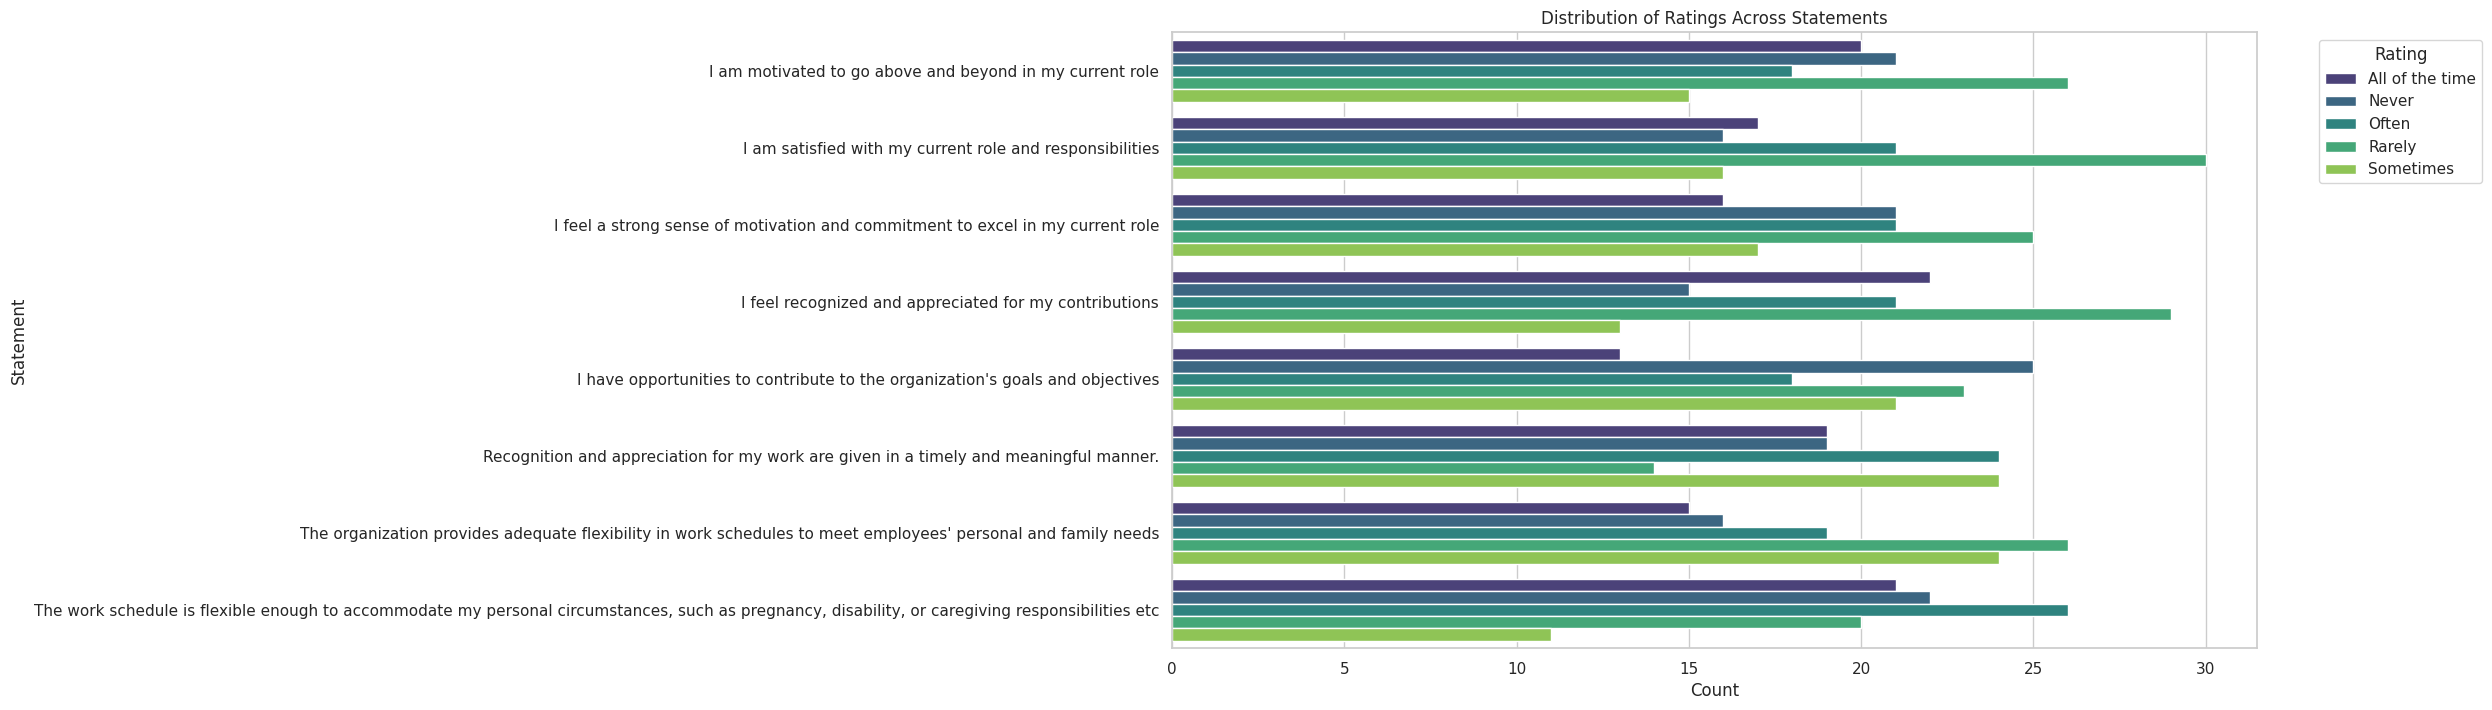

In [ ]:
plotting(rating_counts_recognition)

In [27]:
RecognitionNumbers = recognition(num)
RecognitionNumbers.describe()

,I am satisfied with my current role and responsibilities,I have opportunities to contribute to the organization's goals and objectives,I feel recognized and appreciated for my contributions,Recognition and appreciation for my work are given in a timely and meaningful manner.,The organization provides adequate flexibility in work schedules to meet employees' personal and family needs,"The work schedule is flexible enough to accommodate my personal circumstances, such as pregnancy, disability, or caregiving responsibilities etc",I feel a strong sense of motivation and commitment to excel in my current role,I am motivated to go above and beyond in my current role
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,3.100000,3.150000,3.22000,2.950000,3.030000,3.230000,3.17000,2.880000
std,1.445998,1.388081,1.50138,1.472818,1.403135,1.441485,1.38575,1.380089
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000
50%,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,3.00000,3.000000
75%,5.000000,4.000000,5.00000,4.000000,4.000000,4.000000,4.00000,4.000000
max,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000


In [ ]:
 # Create a new worksheet
new_sheet_title = "Recognition"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_recognition.columns.values.tolist()] + rating_counts_recognition.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Recognition!A1:C41',
 'updatedRows': 41,
 'updatedColumns': 3,
 'updatedCells': 123}

In [ ]:
 # Create a new worksheet
new_sheet_title = "Recognition Numbers"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([RecognitionNumbers.columns.values.tolist()] + RecognitionNumbers.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': "'Recognition Numbers'!A1:H101",
 'updatedRows': 101,
 'updatedColumns': 8,
 'updatedCells': 808}

Job satisfaction and engagement

In [39]:
def satisfaction_engagement(df):
    # Select relevant columns for satisfaction and engagement
    values_satis_engage = df[[
        "The organization invests in my professional development by offering financial support and dedicated time for learning",
        "I receive sufficient learning opportunities in my job",
        "The feedback and performance review process is effective in helping me improve and develop",
        "The feedback I receive is clear and actionable",
        "My immediate supervisor actively supports my professional growth by providing constructive feedback on areas for development",
        "I am open to taking on more responsibilities",
        "There are clear career growth opportunities in the organization",
        "I see myself growing and developing my career at this organization",
        "I know what steps I need to take in order to move up in the organization in the next year",
        "The organization has a strategic workforce plan that identifies upcoming hiring needs with specific skills and experience required for each role",
        "Work incentives reflect the diverse needs and interests of all team members"
    ]]

    return values_satis_engage
# # Assuming `df_text` is your DataFrame
satisfaction_engagement_values = satisfaction_engagement(text)

#     # Melt the DataFrame to long format
melted_values = satisfaction_engagement_values.melt(var_name='Statement', value_name='Rating')

#     # Count occurrences of each rating per statement
rating_counts_satisfaction_engagement = melted_values.groupby(['Statement', 'Rating']).size().reset_index(name='Count')

rating_counts_satisfaction_engagement

,Statement,Rating,Count
0,I am open to taking on more responsibilities,Agree,18
1,I am open to taking on more responsibilities,Disagree,21
2,I am open to taking on more responsibilities,Neutral,27
3,I am open to taking on more responsibilities,Strongly Agree,14
4,I am open to taking on more responsibilities,Strongly Disagree,20
5,I know what steps I need to take in order to m...,Agree,21
6,I know what steps I need to take in order to m...,Disagree,20
7,I know what steps I need to take in order to m...,Neutral,17
8,I know what steps I need to take in order to m...,Strongly Agree,23
9,I know what steps I need to take in order to m...,Strongly Disagree,19


<ipython-input-14-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


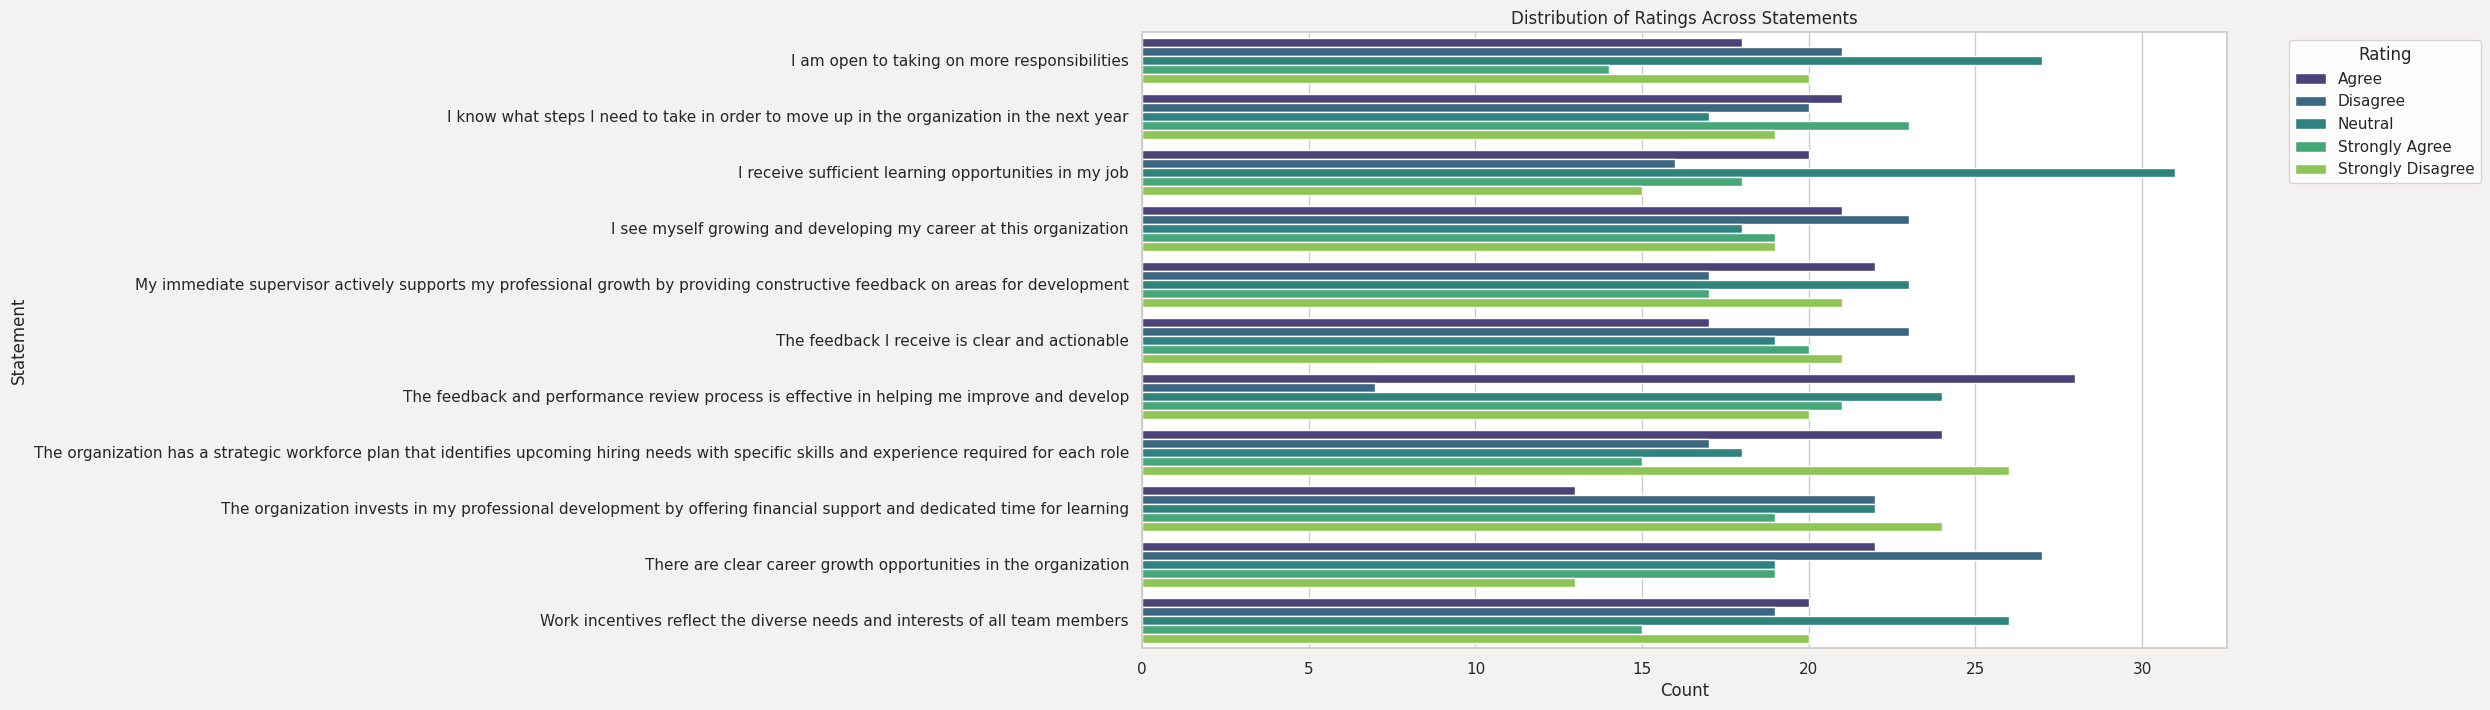

In [40]:
plotting(rating_counts_satisfaction_engagement)

In [41]:
SatisfactionEngagementNumbers = satisfaction_engagement(num)
SatisfactionEngagementNumbers.describe()

,The organization invests in my professional development by offering financial support and dedicated time for learning,I receive sufficient learning opportunities in my job,The feedback and performance review process is effective in helping me improve and develop,The feedback I receive is clear and actionable,My immediate supervisor actively supports my professional growth by providing constructive feedback on areas for development,I am open to taking on more responsibilities,There are clear career growth opportunities in the organization,I see myself growing and developing my career at this organization,I know what steps I need to take in order to move up in the organization in the next year,The organization has a strategic workforce plan that identifies upcoming hiring needs with specific skills and experience required for each role,Work incentives reflect the diverse needs and interests of all team members
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.810000,3.100000,3.230000,2.920000,2.970000,2.850000,3.070000,2.980000,3.090000,2.850000,2.910000
std,1.433333,1.298795,1.398809,1.433228,1.388663,1.320965,1.335264,1.406909,1.450148,1.431076,1.341603
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
 # Create a new worksheet
new_sheet_title = "Satisfaction_Engagement"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_satisfaction_engagement.columns.values.tolist()] + rating_counts_satisfaction_engagement.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Satisfaction_Engagement!A1:C56',
 'updatedRows': 56,
 'updatedColumns': 3,
 'updatedCells': 168}

In [42]:
 # Create a new worksheet
new_sheet_title = "Satisfaction_Engagement_Numbers"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([SatisfactionEngagementNumbers.columns.values.tolist()] + SatisfactionEngagementNumbers.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Satisfaction_Engagement_Numbers!A1:K101',
 'updatedRows': 101,
 'updatedColumns': 11,
 'updatedCells': 1111}

Biases in the workplace

In [51]:
def values_biases(df):
  biases=df[["My success is determined by my skills, dedication, and the value I bring to the team, not by my personal background"
       ,"The organization provides a fair and equitable environment where everyone has equal access to opportunities for professional growth"
       ,"My supervisors and senior leaders actively encourage and welcome all perspectives"
       ,"There are situations where ideas from underserved groups (women, BIPOC individuals, people with disabilities, and non-binary people) are overlooked, while similar ideas from others are more frequently recognized"
       ,"Office tasks, such as note-taking and managing meeting invites, are assigned fairly and according to job descriptions or distributed equally among participants"
       ,"There are informal and formal workplace social outings where all groups, regardless of their background, are welcomed to participate"
       ,"I would be comfortable reporting inappropriate conduct by a colleague"]]
  return biases
# Process the DataFrame
rating_counts_values_biases = values_biases(text)

#     # Melt the DataFrame to long format
melted_values = rating_counts_values_biases.melt(var_name='Statement', value_name='Rating')

#     # Count occurrences of each rating per statement
rating_counts_biases = melted_values.groupby(['Statement', 'Rating']).size().reset_index(name='Count')




<ipython-input-8-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


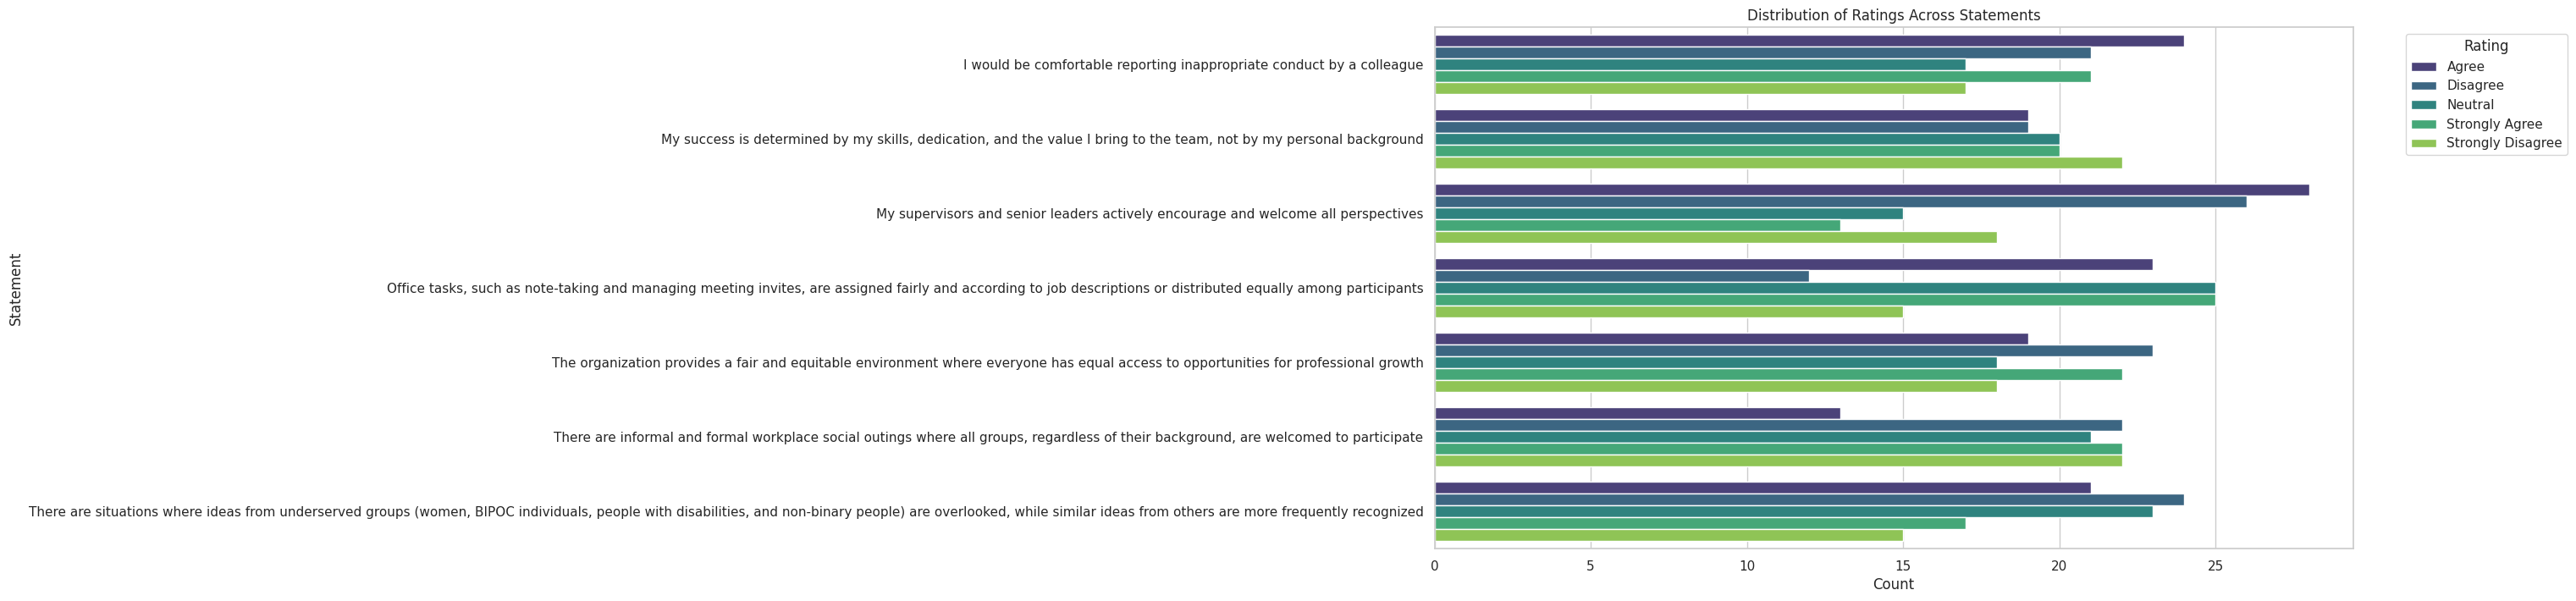

In [ ]:
plotting(rating_counts_values_biases)

In [52]:
BiasesNumbers = values_biases(num)
BiasesNumbers.describe()

,"My success is determined by my skills, dedication, and the value I bring to the team, not by my personal background",The organization provides a fair and equitable environment where everyone has equal access to opportunities for professional growth,My supervisors and senior leaders actively encourage and welcome all perspectives,"There are situations where ideas from underserved groups (women, BIPOC individuals, people with disabilities, and non-binary people) are overlooked, while similar ideas from others are more frequently recognized","Office tasks, such as note-taking and managing meeting invites, are assigned fairly and according to job descriptions or distributed equally among participants","There are informal and formal workplace social outings where all groups, regardless of their background, are welcomed to participate",I would be comfortable reporting inappropriate conduct by a colleague
count,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000
mean,3.010000,2.790000,2.930000,3.220000,3.05,2.950000,3.100000
std,1.417745,1.423433,1.465116,1.322532,1.50,1.493251,1.314257
min,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.00,1.750000,2.000000
50%,3.000000,2.500000,3.000000,3.000000,3.00,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.00,5.000000,5.000000


In [56]:
 # Create a new worksheet
new_sheet_title = "Biases"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_biases.columns.values.tolist()] + rating_counts_biases.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Biases!A1:C36',
 'updatedRows': 36,
 'updatedColumns': 3,
 'updatedCells': 108}

In [57]:
# Create a new worksheet
new_sheet_title = "BiasesNumbers"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
# Ensure BiasesNumbers is a DataFrame
worksheet.update([BiasesNumbers.columns.values.tolist()] + BiasesNumbers.values.tolist())


{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'BiasesNumbers!A1:G101',
 'updatedRows': 101,
 'updatedColumns': 7,
 'updatedCells': 707}

Demographics

In [72]:
full_numeric_df=df_numbers.copy()
full_numeric_df.columns=clean_column_names(full_numeric_df.columns)

In [76]:
# Group by the specified columns and calculate mean and median for a numeric column
# Replace 'numeric_column' with the actual name of the column you want to analyze
grouped_df = full_numeric_df.groupby([
    "Which of the following describes your gender?",
    "Do you identify as a person with a disability?",
    "Do you identify as Indigenous?",
    "Do you identify as visible minority?",
    "Are you a member of the 2SLGBTQI+ communities?",
    "What industry are you working in?",
    "How long have you worked for the organization?"
]).mean(numeric_only=True).reset_index()
grouped_df

,Which of the following describes your gender?,Do you identify as a person with a disability?,Do you identify as Indigenous?,Do you identify as visible minority?,Are you a member of the 2SLGBTQI+ communities?,What industry are you working in?,How long have you worked for the organization?,"I am well-informed about the organization's mission, vision, and values","The teams I work with include a diverse range of backgrounds, skills, and experiences",The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged,...,The organization has a strategic workforce plan that identifies upcoming hiring needs with specific skills and experience required for each role,Work incentives reflect the diverse needs and interests of all team members,"My success is determined by my skills, dedication, and the value I bring to the team, not by my personal background",The organization provides a fair and equitable environment where everyone has equal access to opportunities for professional growth,My supervisors and senior leaders actively encourage and welcome all perspectives,"There are situations where ideas from underserved groups (women, BIPOC individuals, people with disabilities, and non-binary people) are overlooked, while similar ideas from others are more frequently recognized","Office tasks, such as note-taking and managing meeting invites, are assigned fairly and according to job descriptions or distributed equally among participants","There are informal and formal workplace social outings where all groups, regardless of their background, are welcomed to participate",I would be comfortable reporting inappropriate conduct by a colleague,How likely are you to recommend this company to others seeking employment?
0,Man,I prefer not to say,I prefer not to say,I prefer not to say,No,Technology,24,1.0,1.0,5.0,...,4.0,2.0,1.0,3.0,2.0,3.0,1.0,3.0,3.0,5.0
1,Man,I prefer not to say,I prefer not to say,No,I prefer not to say,Finance,9,1.0,2.0,5.0,...,3.0,4.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0,2.0
2,Man,I prefer not to say,No,I prefer not to say,I prefer not to say,Technology,1,4.0,1.0,3.0,...,3.0,5.0,3.0,4.0,2.0,2.0,4.0,5.0,5.0,3.0
3,Man,I prefer not to say,No,I prefer not to say,No,Retail,24,1.0,4.0,1.0,...,1.0,4.0,4.0,4.0,4.0,1.0,2.0,3.0,1.0,2.0
4,Man,I prefer not to say,No,I prefer not to say,Yes,Technology,30,1.0,2.0,1.0,...,3.0,1.0,2.0,3.0,5.0,1.0,2.0,5.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Woman,Yes,I prefer not to say,No,I prefer not to say,Finance,15,1.0,3.0,3.0,...,5.0,3.0,1.0,3.0,4.0,4.0,1.0,1.0,2.0,3.0
96,Woman,Yes,No,I prefer not to say,No,Agriculture,25,1.0,3.0,4.0,...,3.0,3.0,5.0,5.0,1.0,4.0,2.0,5.0,2.0,1.0
97,Woman,Yes,No,I prefer not to say,No,Non-for-profit,28,4.0,2.0,1.0,...,1.0,3.0,3.0,1.0,3.0,3.0,4.0,2.0,3.0,3.0
98,Woman,Yes,No,No,No,Transportation,28,5.0,4.0,2.0,...,3.0,1.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,1.0
